<h2>Importing Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

<h1>Loading Dataset</h1>

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<h1>Data Explore</h1>

In [3]:
print("Data Shape:", data.shape)
print("Data Length:", len(data))
print("\n")
print("Data Types:\n", data.dtypes)
print("\n")
print("Data Description:\n", data.describe())

Data Shape: (480, 17)
Data Length: 480


Data Types:
 gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


Data Description:
        raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000        

In [4]:
print("Data Information:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

<h1>Data Cleaning</h1>

<h2>Checking Missing Values</h2>

In [5]:
missing_values = data.isnull().sum()
print(missing_values)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


<h2>Checking and replacing zero values</h2>

In [6]:
zero_values = (data == 0).sum()
print("\nZero Values before cleaning:\n", zero_values)


Zero Values before cleaning:
 gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                     0
raisedhands                  9
VisITedResources             7
AnnouncementsView           10
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           0
Class                        0
dtype: int64


In [7]:
# Identify numerical columns to replace zero values
numerical_vars_with_zeros = ['raisedhands', 'VisITedResources', 'AnnouncementsView']

# Replace zero values with NaN and then fill NaN with the column mean
for col in numerical_vars_with_zeros:
    data[col] = data[col].replace(0, np.NaN)
    data[col] = data[col].fillna(data[col].mean())
    
#Checking if the zero values are replaced
zero_values = (data == 0).sum()
print("\nZero Values after cleaning:\n", zero_values)


Zero Values after cleaning:
 gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


<h2>Identfying and Dropping Duplicate Values</h2>

In [8]:
# Identifying duplicate values
print("Duplicate values per column:", data.duplicated().sum())

Duplicate values per column: 2


In [9]:
# Handling Duplicate Values
data = data.drop_duplicates()
print("Dataset Shape After Removing Duplicates:", data.shape)

Dataset Shape After Removing Duplicates: (478, 17)


<h2>Outlier Checking</h2>

In [10]:
# List of numerical columns
numerical_vars_with_zeros = ['raisedhands', 'VisITedResources', 'AnnouncementsView']

# Filter the DataFrame to include only numerical columns
numerical_df = data[numerical_vars_with_zeros]

# Function to detect outliers using the IQR method
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = ((df[column] < lower_bound) | (df[column] > upper_bound))
        outliers[column] = df[column][outlier_condition]
    return outliers
    # Detect and print outliers before removal
print("\nOutliers before removal:")
outliers_before = detect_outliers(numerical_df)
for column, outliers in outliers_before.items():
    print(f"{column}: {outliers.index.tolist()}")


Outliers before removal:
raisedhands: []
VisITedResources: []
AnnouncementsView: []


<h1>Data Preprocessing</h1>

<h2>Encoding Categorical Values</h2>

In [11]:
#Identifying categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist() 
print("Identified categorical columns:\n",categorical_cols)

Identified categorical columns:
 ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']


In [12]:
# Encoding the categorical values
label_encoders = {}
for column in categorical_cols:
    if column != 'Class':  
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encoding the target variable separately
target_encoder = LabelEncoder()
data['Class'] = target_encoder.fit_transform(data['Class'])

In [13]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15.0,16.0,2.000000,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20.0,20.0,3.000000,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10.0,7.0,38.725532,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30.0,25.0,5.000000,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40.0,50.0,12.000000,50,0,0,0,2


In [14]:
print(data['Class'].value_counts())

Class
2    211
0    142
1    125
Name: count, dtype: int64


In [15]:
# Separate input features and target variable
X = data.drop('Class', axis=1)
y = data['Class']
# Apply SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resample, y_resample = smote_enn.fit_resample(X, y)

# Convert back to DataFrame for consistency
data = pd.concat([pd.DataFrame(X_resample, columns=X.columns), pd.Series(y_resample, name='Class')], axis=1)

# Display new class distribution
print(data['Class'].value_counts())

Class
1    129
0     92
2     50
Name: count, dtype: int64


<h2>Checking correlation among variables</h2>

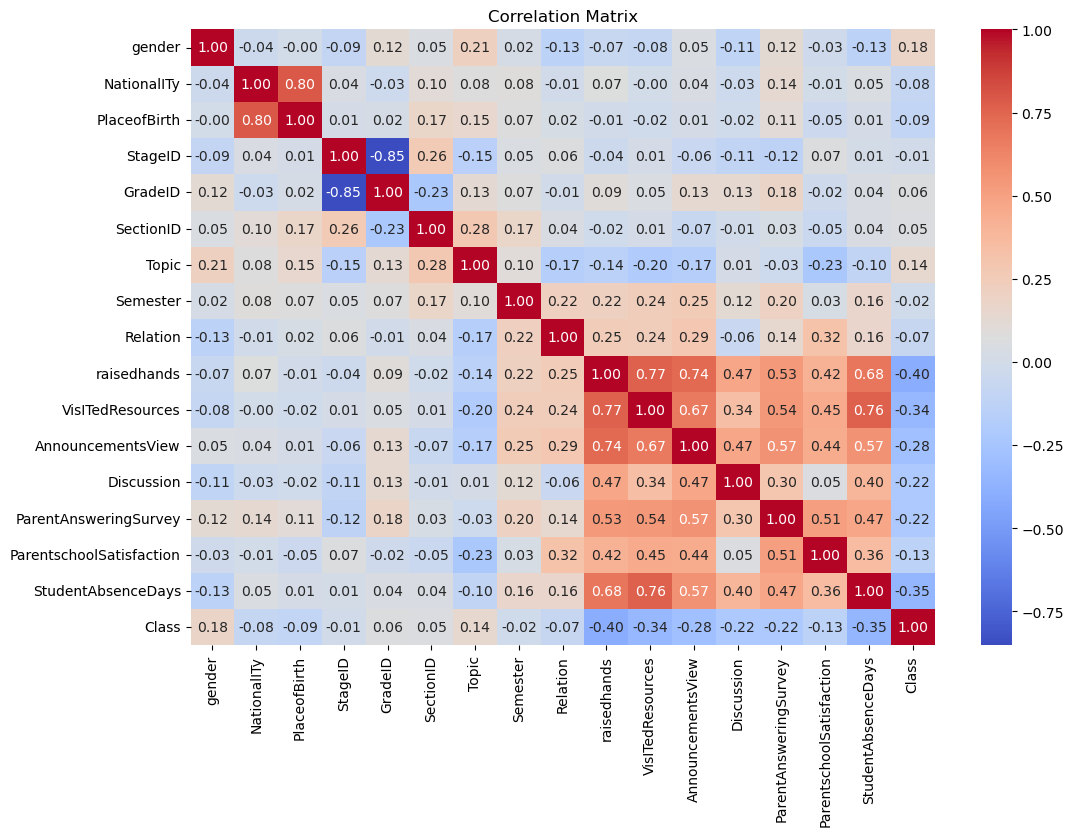

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h2>Dropping Column to avoid Overfitting</h2>

In [17]:
#Droppping PlaceofBirth to avoid overfitting
data = data.drop(columns=['PlaceofBirth'])
data.head(3)

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,4,0,8,0,10,0,1,49.0,70.0,19.0,75,1,1,1,0
1,0,12,1,4,1,8,0,1,80.0,90.0,49.0,55,1,0,1,0
2,1,4,2,0,1,7,0,0,80.0,90.0,55.0,19,1,1,1,0


<h1>Explanatory Data Analysis</h1>

<h2>Scatterplot among numeric variables</h2>

<Figure size 1500x1000 with 0 Axes>

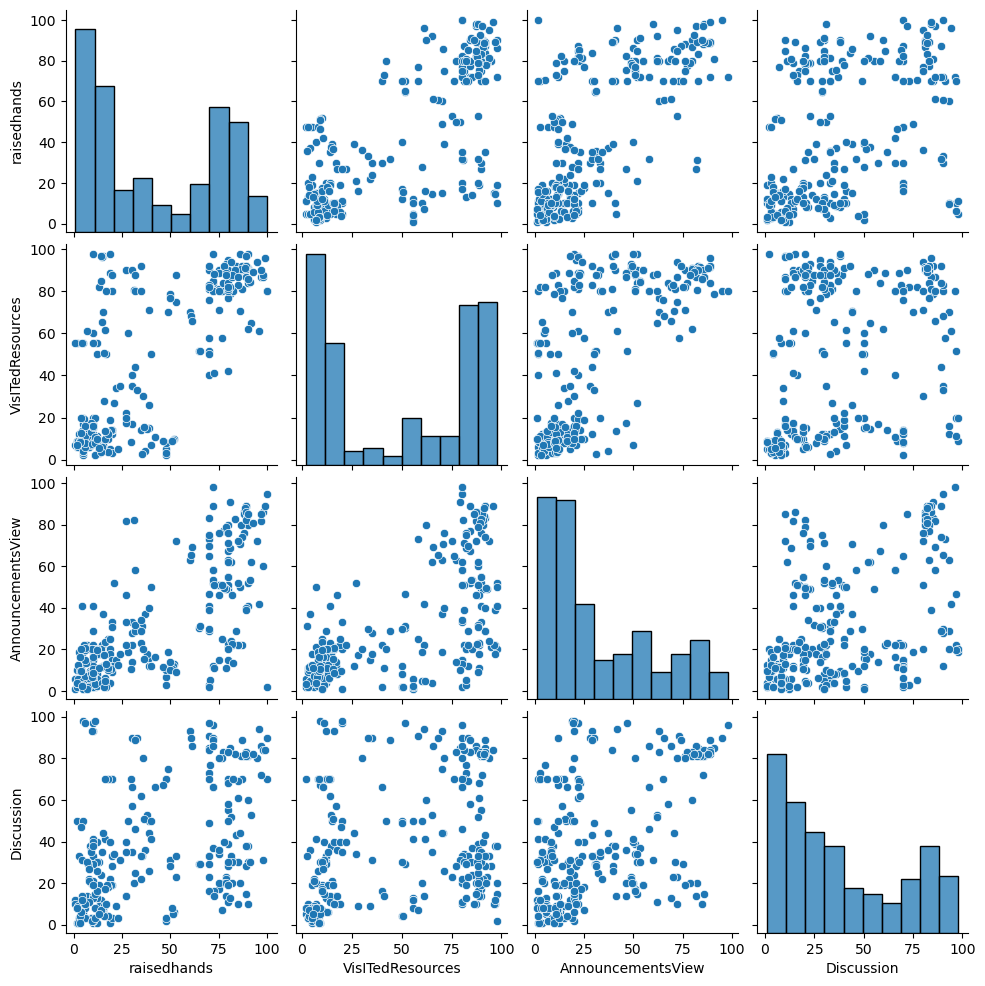

In [18]:
#Scatterplot for numerical columns
numerical_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
plt.figure(figsize=(15,10))
sns.pairplot(data[numerical_cols])
plt.show()

<h2>Visualization using Box Plot</h2>

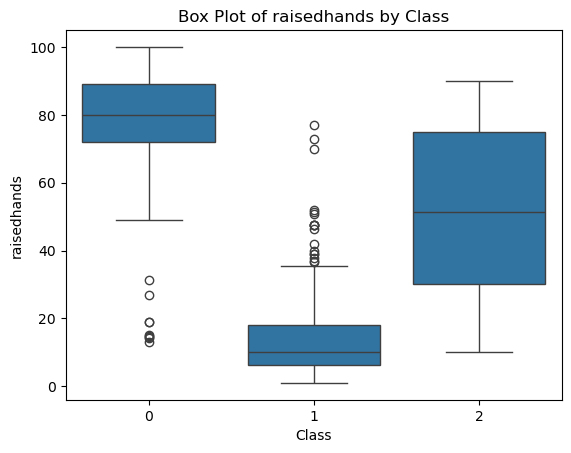

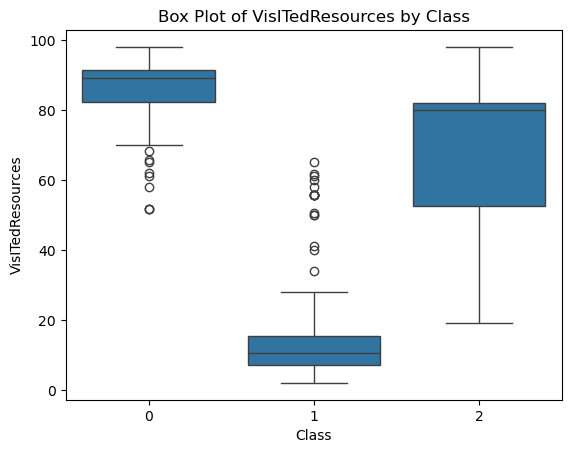

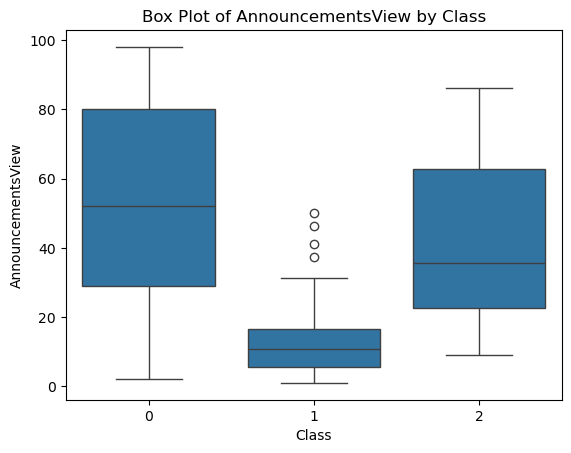

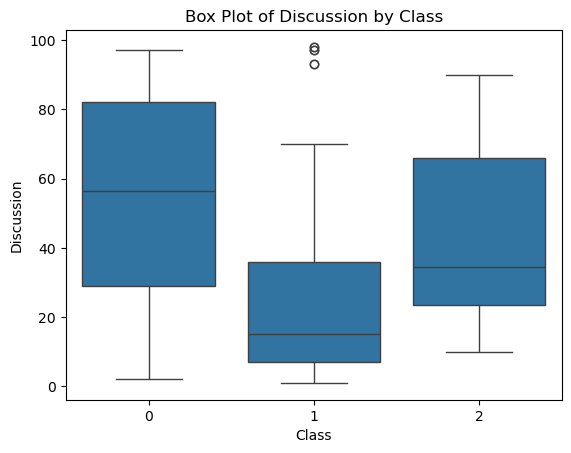

In [19]:
#Box plot of numerical variables against Class variable
target = 'Class'
for col in numerical_cols:
    sns.boxplot(x=target, y=col, data = data)
    plt.title(f'Box Plot of {col} by {target}')
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.show()

<h2>Visualization using Histogram</h2>

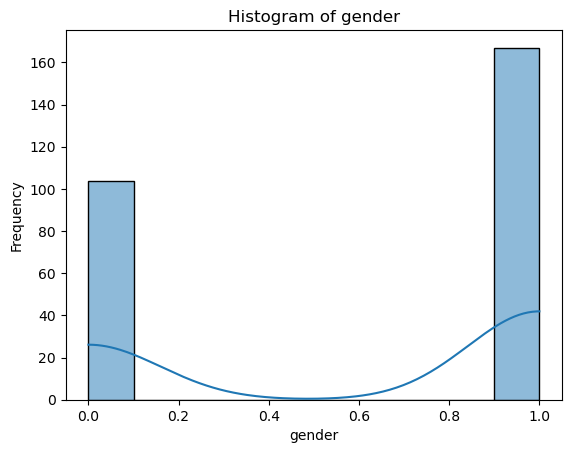

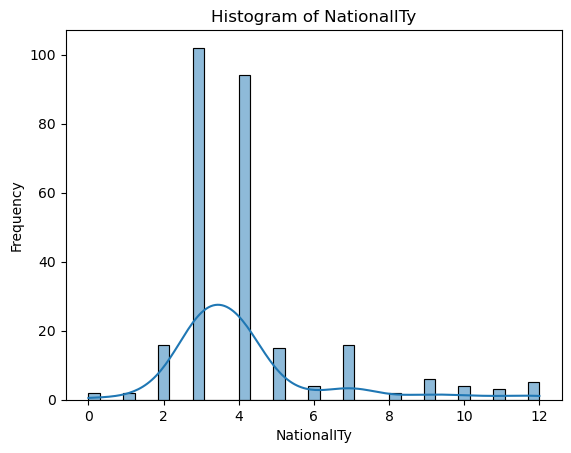

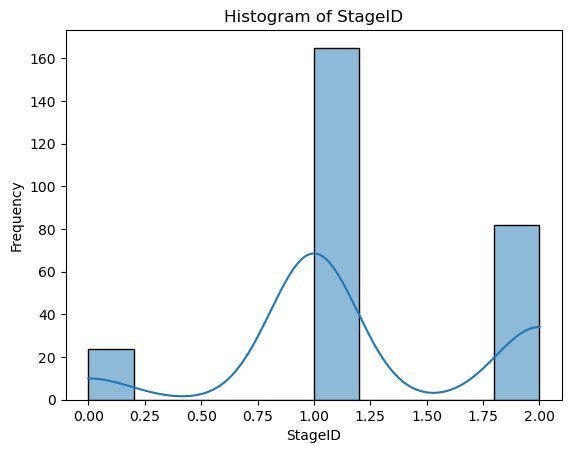

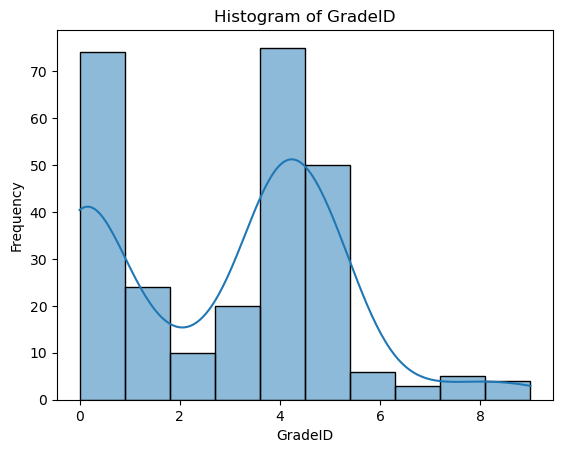

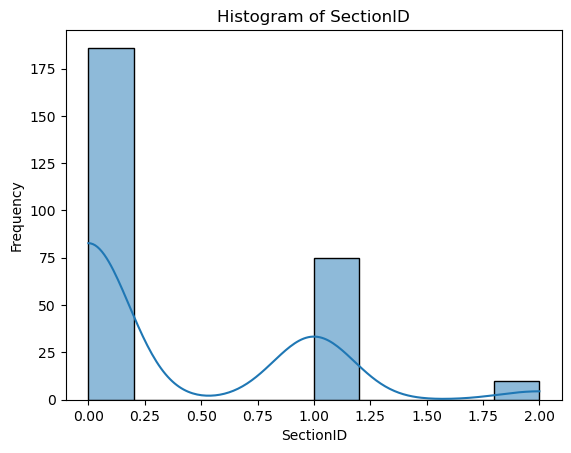

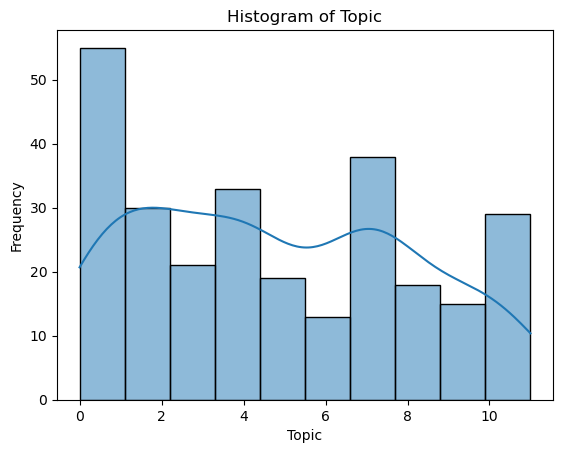

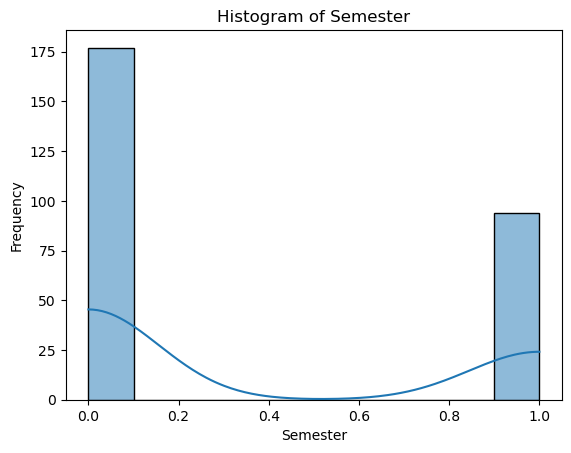

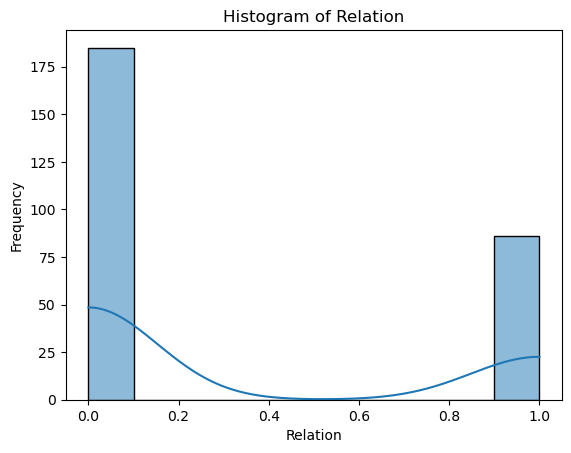

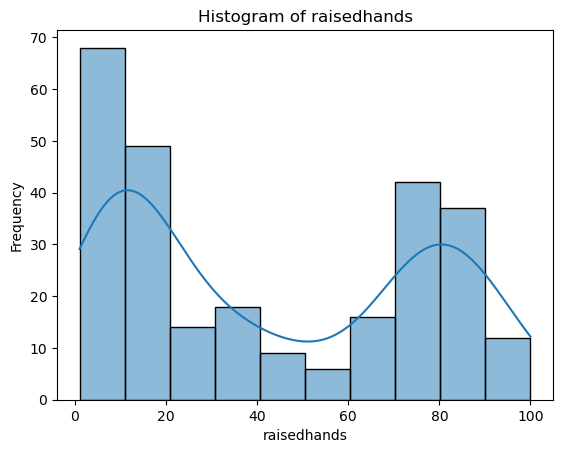

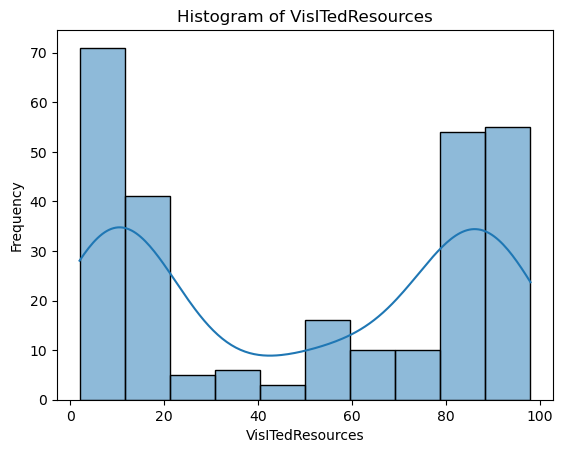

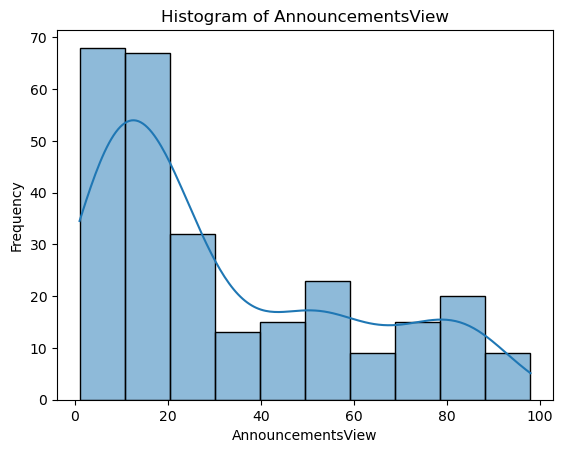

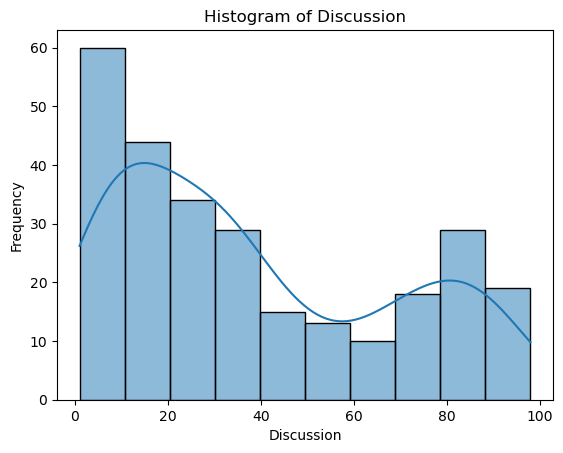

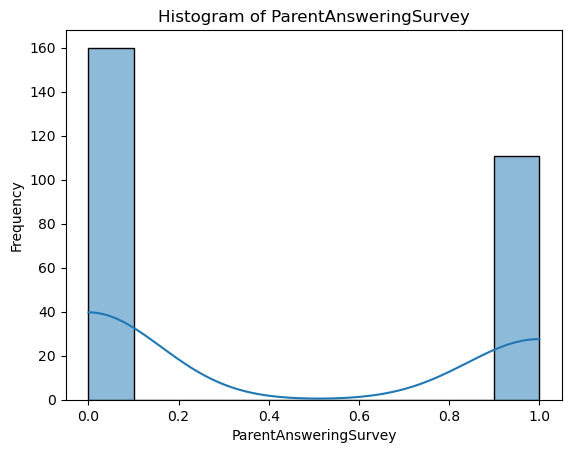

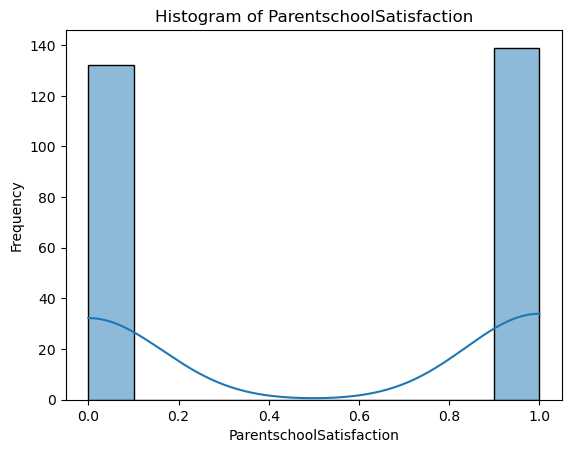

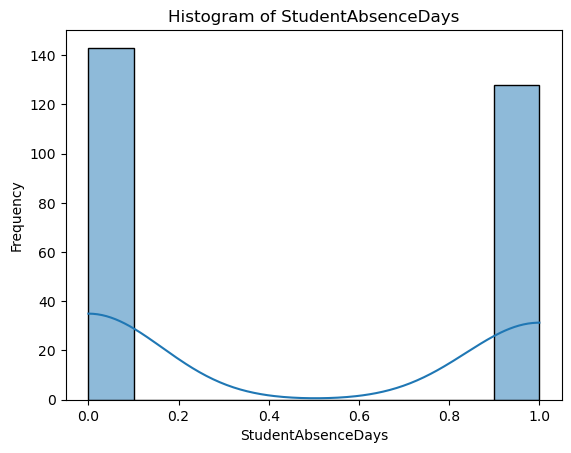

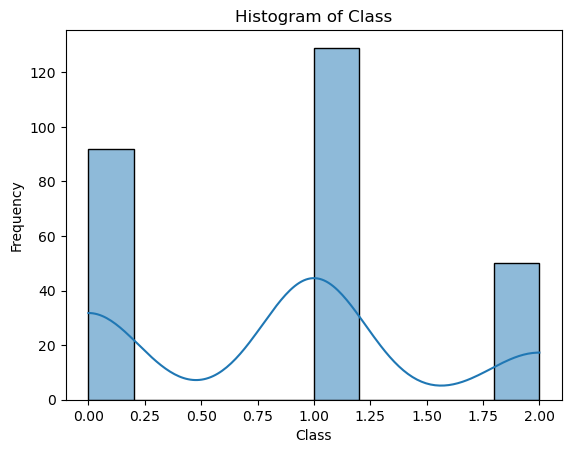

In [20]:
for col in data:
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<h2>Splitting Data</h2>

In [21]:
X = data.drop('Class', axis=1)
y = data['Class']

In [22]:
#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<h2>Decision Tree Model</h2>

In [23]:
dt_classifier = DecisionTreeClassifier(random_state=123)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

In [24]:
#Making prediction
y_pred = dt_classifier.predict(X_test)

<h2>Decision Tree Model Evaluation</h2>

In [25]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8780487804878049
Precision: 0.8780487804878049
Recall: 0.8780487804878049
F1 Score: 0.8780487804878049


In [26]:
# Storing the metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Score'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_15804\1900305599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


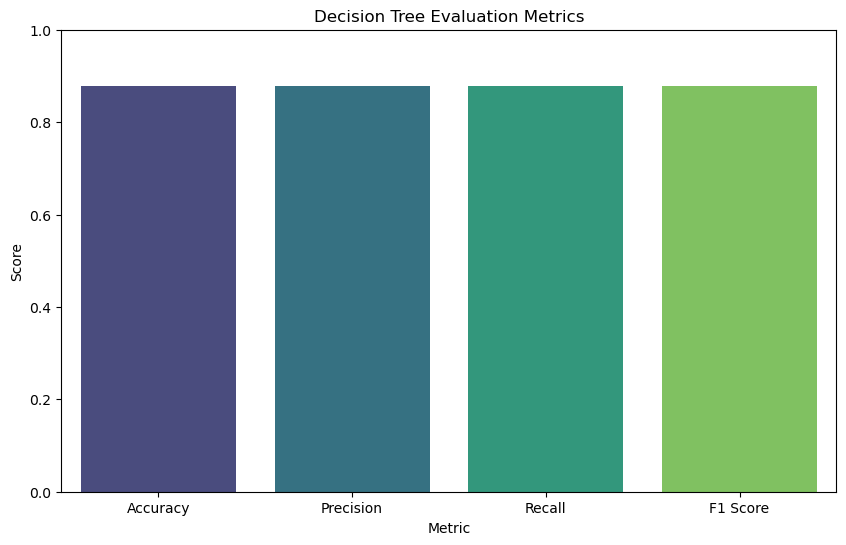

In [27]:
# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Decision Tree Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

Confusion Matrix:
[[26  0  5]
 [ 0 33  0]
 [ 5  0 13]]


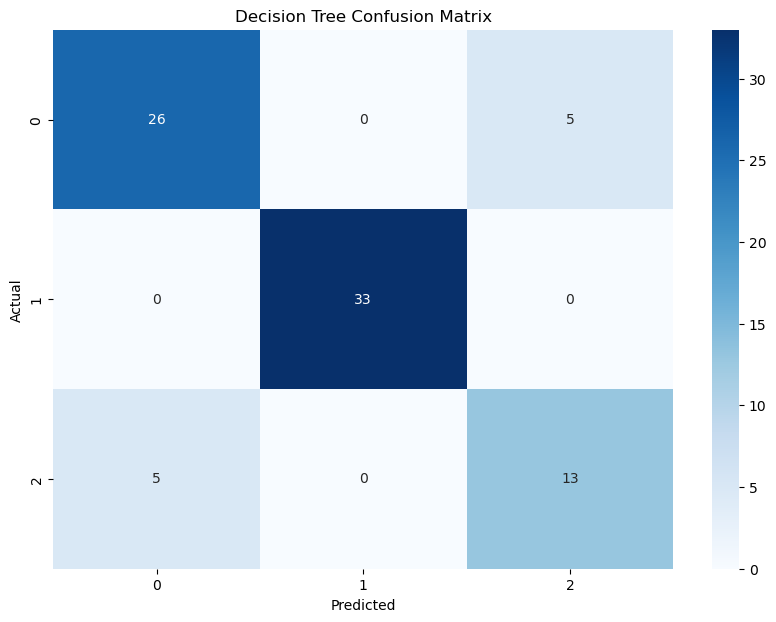

In [28]:
#Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Plotting confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

<h1>Random Forest</h1>

In [29]:
# Initializing the Random Forest model
rf_classifier = RandomForestClassifier(random_state=123)

In [30]:
# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_classifier.predict(X_test)

In [31]:
# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Printing the metrics
print("Random Forest Model")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Model
Accuracy: 0.9512195121951219
Precision: 0.9512195121951219
Recall: 0.9512195121951219
F1 Score: 0.9512195121951219


In [32]:
# Storing the metrics in a dictionary
metrics_rf = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}

# Convert the dictionary to a DataFrame
metrics_rf_df = pd.DataFrame(list(metrics_rf.items()), columns=['Metric', 'Score'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_15804\1252783413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_rf_df, palette='viridis')


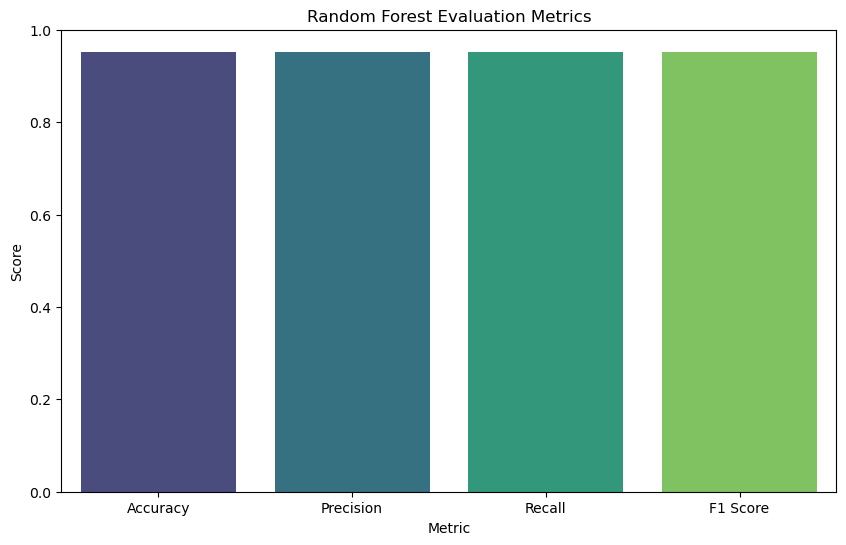

Confusion Matrix:
[[29  0  2]
 [ 0 33  0]
 [ 2  0 16]]


In [33]:
# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_rf_df, palette='viridis')
plt.title('Random Forest Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Evaluating the model with confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

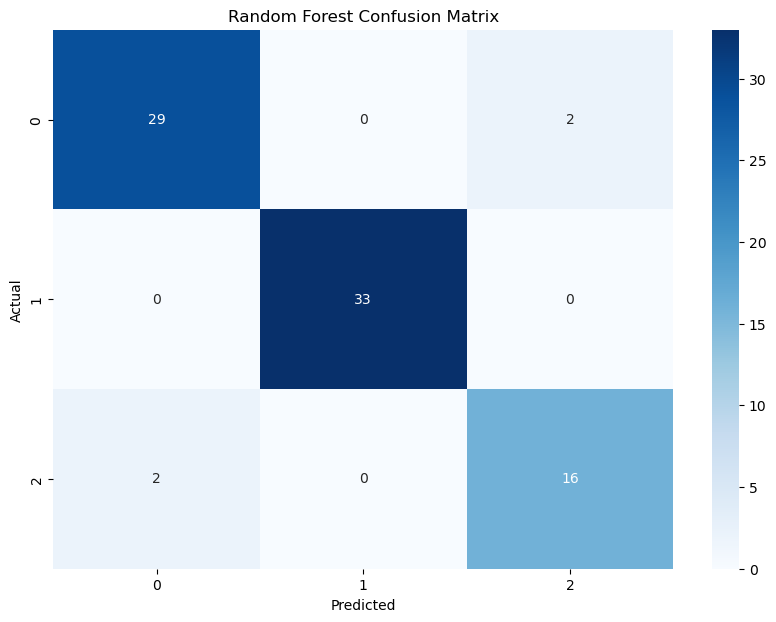

In [34]:
# Plotting confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

<h2>Deep Learning</h2>

In [35]:
target_variable = 'Class'  
X = data.drop(columns=[target_variable])
y = data[target_variable]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [36]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y_categorical, test_size=0.2, random_state=123)

def create_nn_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_categorical.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train_dl.shape[1])
nn_model.fit(X_train_dl, y_train_dl, epochs=50, batch_size=32, validation_data=(X_test_dl, y_test_dl), verbose=0)


C:\Users\ACER\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
loss, accuracy_nn = nn_model.evaluate(X_test_dl, y_test_dl, verbose=0)
y_pred_dl = nn_model.predict(X_test_dl)
y_pred_classes_dl = np.argmax(y_pred_dl, axis=1)

precision_nn = precision_score(np.argmax(y_test_dl, axis=1), y_pred_classes_dl, average='weighted')
recall_nn = recall_score(np.argmax(y_test_dl, axis=1), y_pred_classes_dl, average='weighted')
f1_nn = f1_score(np.argmax(y_test_dl, axis=1), y_pred_classes_dl, average='weighted')

# Printing the metrics
print("Deep Learning Model")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)

metrics_nn = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1 Score': f1_nn
}

metrics_nn_df = pd.DataFrame(list(metrics_nn.items()), columns=['Metric', 'Score'])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Deep Learning Model
Accuracy: 0.8909090757369995
Precision: 0.8944646464646465
Recall: 0.8909090909090909
F1 Score: 0.8841537908731585


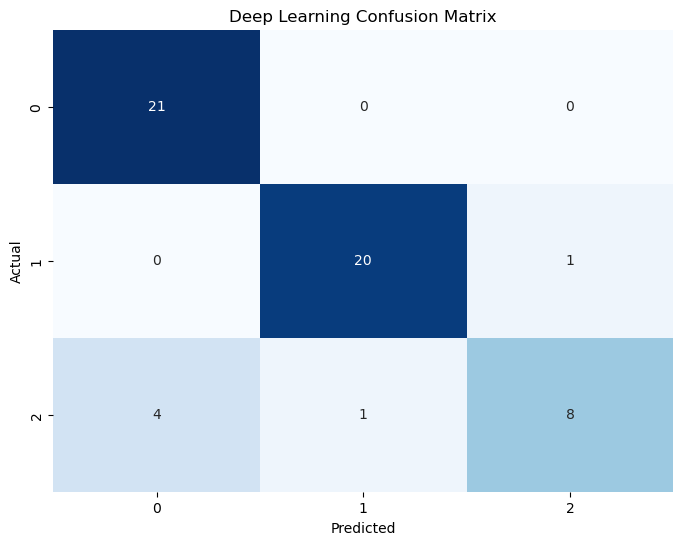

In [42]:
# Compute confusion matrix
conf_matrix_nn = confusion_matrix(np.argmax(y_test_dl, axis=1), y_pred_classes_dl)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Deep Learning Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_15804\3574368294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_rf_df, palette='viridis')


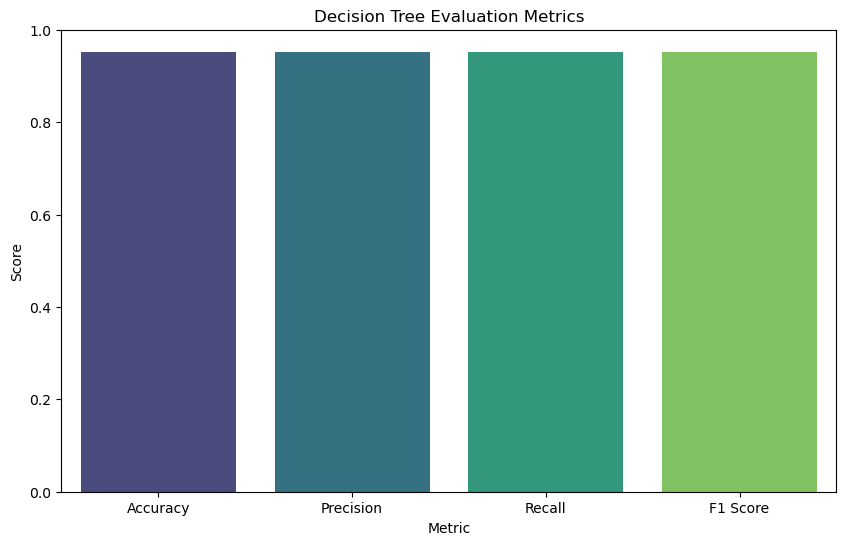

In [39]:
# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_rf_df, palette='viridis')
plt.title('Decision Tree Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()


<h2>Models Comparision</h2>

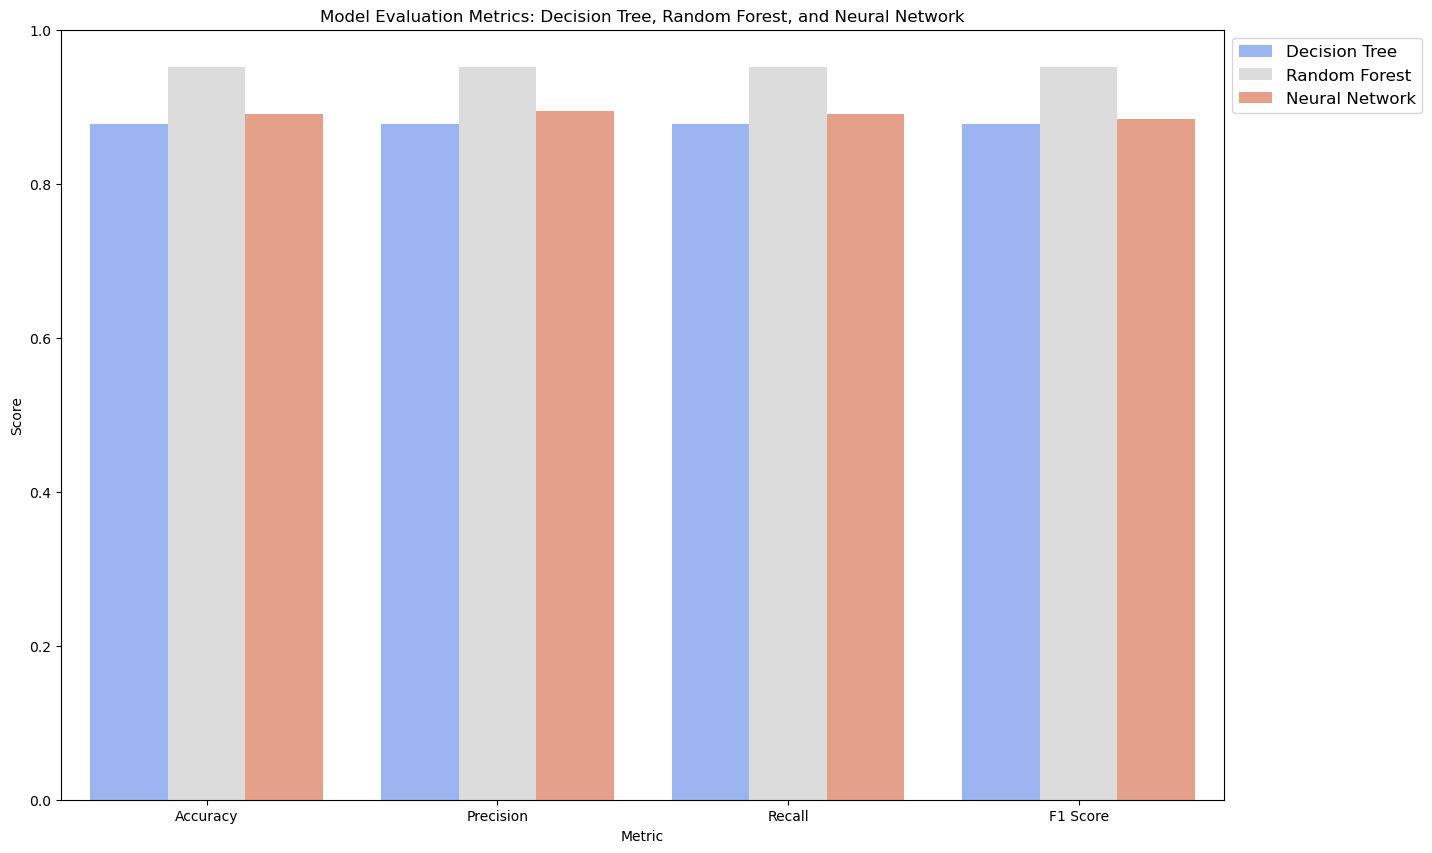

In [40]:
metrics_combined = {
    'Model': ['Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree',
              'Random Forest', 'Random Forest', 'Random Forest', 'Random Forest',
              'Neural Network', 'Neural Network', 'Neural Network', 'Neural Network'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score',
               'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1,
              accuracy_rf, precision_rf, recall_rf, f1_rf,
              accuracy_nn, precision_nn, recall_nn, f1_nn]
}

metrics_combined_df = pd.DataFrame(metrics_combined)

plt.figure(figsize=(15, 10))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_combined_df, palette='coolwarm')
plt.title('Model Evaluation Metrics: Decision Tree, Random Forest, and Neural Network')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(loc='upper left')
plt.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))

plt.show()
